In [1]:
# Colab environment already has nltk
# !pip install nltk
# !pip install wordcloud

In [2]:
"""
BEAD Group Project : SG Car Mart (4 columns of interest: car_features, car_accessories, descriptions, category)
"""

'\nBEAD Group Project : SG Car Mart (4 columns of interest: car_features, car_accessories, descriptions, category)\n'

In [3]:
# loading in all the essentials for data manipulation
import pandas as pd
import numpy as np
import os
import string
import nltk
import collections
# This is our visual library
import seaborn as sns
import wordcloud
import matplotlib.pyplot as plt
# This allows to create individual objects from a bag of words
# ngrams allows to group words in common pairs or trigrams..etc
from nltk import word_tokenize, FreqDist, pos_tag, ngrams 
from nltk.corpus import wordnet as wn
#load in the NTLK stopwords to remove articles, preposition and other words that are not actionable
from nltk.corpus import reuters, stopwords 
# Lemmatizer helps to reduce words to the base form
from nltk.stem import WordNetLemmatizer
# mean allows us to know ave word/character count for variables
from statistics import mean
# We can use counter to count the objects from collections
from collections import Counter
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image

In [4]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
nltk.download('universal_tagset')
nltk.download('reuters')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!
[nltk_data] Downloading package reuters to /root/nltk_data...
[nltk_data]   Package reuters is already up-to-date!


True

In [5]:
# Get the list of default stopwords
stop_words = set(stopwords.words('english'))

# Add custom stop words to the set
custom_stop_words = ['feature', 'view', 'spec']
stop_words.update(custom_stop_words)

# Print the updated set of stop words
print(stop_words)

{'can', 'the', 'down', 'hers', 'll', 'or', 't', 'itself', "should've", 'why', 'couldn', 'yourself', 'to', 'against', 'needn', 'here', 'shan', 'too', "you'd", 'because', 'for', 'aren', 'not', 'hadn', 'now', 'did', 'been', 'a', 'about', 'm', "wasn't", 've', 'any', 'after', 'when', 'over', 'as', 'once', 'himself', 'it', 'at', 'how', 'doesn', 'don', "that'll", 'into', 'our', "hasn't", "shouldn't", 'same', "shan't", 'that', 'these', 'before', 'whom', "hadn't", 'out', 'hasn', 'wouldn', 'each', 'there', 's', 'both', 'my', 'do', 'very', 're', "haven't", 'is', 'own', 'what', "wouldn't", 'their', 'he', 'those', 'are', 'y', 'ma', 'spec', 'which', 'more', 'between', 'wasn', 'them', 'shouldn', 'have', 'her', 'again', 'you', "weren't", 'this', 'has', 'of', 'being', 'having', "she's", 'should', 'yourselves', 'who', 'if', 'your', "doesn't", 'o', 'was', 'by', 'ourselves', 'ain', "needn't", 'she', 'him', "you've", 'such', 'nor', 'then', 'his', 'me', 'they', 'and', 'above', "aren't", 'than', 'below', 'do

In [6]:
# Reminder: In CoLab, upload/drag and drop the Olist file into the working files
car_data = pd.read_csv("sgcarmart_usedcar_info_sgcarmart_usedcar_info_8922rows.csv", encoding="latin1")

In [7]:
car_data

,ï»¿model,price,depreciation,registration_date,mileage,road_tax,deregistration_value,coe,engine_cap,curb_weight,...,omv,arf,power,number_of_owner,type,car_features,car_accessories,descriptions,category,status
0,Honda Shuttle 1.5A G,"$89,800","$20,740",05-May-2017,N.A.,$682 /yr,"$27,393","$53,001","1,496 cc","1,130 kg",...,"$19,387","$9,387",97.0 kW (130 bhp),2,Stationwagon,Features Fuel efficient 16v DOHC 1.51 I-VTEC e...,"Accessories Keyless start/stop push button, to...",Description Solid condition. Non PHV unit. Vie...,CategoryPARF Car,Available for sale. Shortlist this car to get ...
1,Honda Vezel 1.5A X,"$54,800","$15,950",11-May-2016,"108,000 km (15.7k /yr)",$682 /yr,"$20,907","$46,009","1,496 cc","1,190 kg",...,"$20,054","$10,076",96.0 kW (128 bhp),3,SUV,Features Powered by Earth Dreams direct inject...,"Accessories Sports rims, reverse camera/sensor...",Description Immaculate condition! Superbly mai...,"CategoryPARF Car, Premium Ad Car",Available for sale. Shortlist this car to get ...
2,BMW X5 xDrive35i 7-Seater Sunroof (COE till 09...,"$119,500","$15,940",24-Sep-2010,N.A.,"$3,071 /yr","$26,187","$34,935","2,979 cc","2,070 kg",...,"$68,364","$68,364",225.0 kW (301 bhp),5,SUV,Features 3L 6 cylinders inline twin power turb...,Accessories M-Sport body kit. Sunroof. 7 seate...,Description More then just a regular SUV. Powe...,"CategoryCOE Car, Premium Ad Car",Available for sale. Shortlist this car to get ...
3,Lexus GS300 Passionate Black (COE till 07/2029),"$78,800","$12,420",30-Jul-2009,"140,000 km (10.2k /yr)","$3,332 /yr","$27,200","$42,885","2,995 cc","1,660 kg",...,"$56,324","$56,324",183.0 kW (245 bhp),5,Luxury Sedan,Features Rare and only GS300 passionate black ...,"Accessories F Sport Carbon steering, Tesla des...",Description The only passionate black series i...,CategoryCOE Car,Available for sale. Shortlist this car to get ...
4,Volkswagen Sportsvan 1.4A TSI Comfortline,"$68,800","$14,420",22-May-2017,N.A.,$624 /yr,"$33,724","$51,106","1,395 cc","1,383 kg",...,"$22,052","$17,873",92.0 kW (123 bhp),1,Hatchback,Features Powerful and smooth 1.4 TSI engine tu...,"Accessories Factory fitted audio system, knock...",Description Best selling continental brand in ...,CategoryPARF Car,Available for sale. Shortlist this car to get ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8917,Porsche Panamera 3.6A PDK Sunroof (COE till 12...,N.A,N.A,29-Dec-2011,N.A.,"$3,998 /yr",N.A.,"$73,954","3,605 cc","1,760 kg",...,"$133,789","$133,789",300.0 kW (402 bhp),1,Sports Car,Features 3.6l V6 engine producing 296bhp & 400...,"Accessories Aero kit/sport design package, Sun...","Description Rare 1 owner, fully agent maintain...","CategoryCOE Car, Premium Ad Car, Low Mileage Car",SOLD
8918,Honda Vezel 1.5A X Honda Sensing,N.A,N.A,21-Oct-2015,N.A.,$682 /yr,N.A.,"$57,498","1,496 cc","1,190 kg",...,"$19,670","$9,670",96.0 kW (128 bhp),1,SUV,Features Fuel efficient 1.5l DOHC I-VTEC engin...,"Accessories Sports rims, leather seats, touchs...","Description Consignment unit, lowest depre. 1 ...",CategoryPARF Car,SOLD
8919,Nissan NV200 1.5M,"$29,800","$11,260",20-Nov-2015,N.A.,N.A.,"$11,949","$45,149","1,461 cc","1,360 kg",...,"$25,875","$1,294",2,2,Van,Features View specs of the Nissan NV200 (2010-...,NaN,Description Popular fuel saving medium size va...,CategoryPremium Ad Car,Available for sale. Shortlist this car to get ...
8920,Mercedes-Benz Vito 109 CDI,N.A,N.A,21-Jan-2020,N.A.,N.A.,N.A.,"$24,402","1,598 cc","1,780 kg",...,"$28,184","$1,410",1,1,Van,NaN,"Accessories Front recording camera, rear recor...",Description Rare 1 owner 2020 unit! Fully main...,SOLD,ResourcesCar Valuation - FreeFind out the mark...


In [8]:
# Take a look at the columns of interest in the csv object
print(car_data['car_features'])
print(car_data['car_accessories'])
print(car_data['descriptions'])
print(car_data['category'])

0       Features Fuel efficient 16v DOHC 1.51 I-VTEC e...
1       Features Powered by Earth Dreams direct inject...
2       Features 3L 6 cylinders inline twin power turb...
3       Features Rare and only GS300 passionate black ...
4       Features Powerful and smooth 1.4 TSI engine tu...
                              ...                        
8917    Features 3.6l V6 engine producing 296bhp & 400...
8918    Features Fuel efficient 1.5l DOHC I-VTEC engin...
8919    Features View specs of the Nissan NV200 (2010-...
8920                                                  NaN
8921    Features View specs of the Honda N-Van Petrol ...
Name: car_features, Length: 8922, dtype: object
0       Accessories Keyless start/stop push button, to...
1       Accessories Sports rims, reverse camera/sensor...
2       Accessories M-Sport body kit. Sunroof. 7 seate...
3       Accessories F Sport Carbon steering, Tesla des...
4       Accessories Factory fitted audio system, knock...
                        

In [9]:
car_data.describe()

# From a quick glance, there are some missing values in the:
# car_features, car_accessories, descriptions

,ï»¿model,price,depreciation,registration_date,mileage,road_tax,deregistration_value,coe,engine_cap,curb_weight,...,omv,arf,power,number_of_owner,type,car_features,car_accessories,descriptions,category,status
count,8922,8922,8922,8922,8922,8922,8922,8922,8922,8922,...,8880,8852,8773,8772,8922,8858,7703,8851,8922,8922
unique,3801,1706,2447,3327,4567,500,5132,1549,285,650,...,6595,6510,330,7,11,7499,7035,8380,213,79
top,Honda Vezel 1.5A X,N.A,N.A,N.A.,N.A.,N.A.,N.A.,N.A.,"1,496 cc",N.A.,...,N.A.,"$5,000",1,1,SUV,Features View specs of the Toyota Hiace,Accessories All our vehicles have undergone a ...,Description Join our Carro agent program today...,CategoryPARF Car,Available for sale. Shortlist this car to get ...
freq,89,2677,2669,45,3969,891,3008,242,724,181,...,25,234,496,3589,1831,107,51,52,1607,5564


In [10]:
# Create a new list for car_features
car_features = car_data.loc[:,"car_features"]
new_carfeatures = [s for s in car_features if isinstance(s, str)]

# Repeat for other 3 columns of interest
car_accessories = car_data.loc[:,"car_accessories"]
new_caraccessories = [s for s in car_accessories if isinstance(s, str)]

descriptions = car_data.loc[:,"descriptions"]
new_descriptions = [s for s in descriptions if isinstance(s, str)]

categories = car_data.loc[:,"category"]
new_categories = [s for s in categories if isinstance(s, str)]

In [11]:
# create a function to clean the words of punctuation, stop words and lemmatize the words
def clean_words(new_tokens):
    new_tokens = [t.lower() for t in new_tokens]
    new_tokens = [t for t in new_tokens if t not in stopwords.words('english')]
    new_tokens = [t for t in new_tokens if t.isalpha()]
    lemmatizer = WordNetLemmatizer()
    new_tokens =[lemmatizer.lemmatize(t) for t in new_tokens]
    return new_tokens

In [12]:
# create a function to sum the counters
def sumCounters(countersList):
    c = Counter()
    for counter in countersList:
        c += counter
    return c

In [13]:
# tokenize the columns first, then run clean_words on them
tok_carfeatures = [clean_words(word_tokenize(s)) for s in new_carfeatures] 
tok_caraccessories = [clean_words(word_tokenize(s)) for s in new_caraccessories] 
tok_descriptions = [clean_words(word_tokenize(s)) for s in new_descriptions] 
tok_new_categories = [clean_words(word_tokenize(s)) for s in new_categories] 

In [14]:
# Features: count the words in the titles, by individual words, pairs, trigrams
features_1 = sumCounters([Counter(s) for s in tok_carfeatures])
features_2grams = sumCounters([Counter(ngrams(s,2)) for s in tok_carfeatures])
features_3grams = sumCounters([Counter(ngrams(s,3)) for s in tok_carfeatures])
features_4grams = sumCounters([Counter(ngrams(s,4)) for s in tok_carfeatures])

# Create data frames and do visualisation
df_features_1 = pd.DataFrame(features_1.items(),columns=['word','frequency']).sort_values(by='frequency',ascending=False)
df_features_2grams = pd.DataFrame(features_2grams.items(),columns=['pairs','frequency']).sort_values(by='frequency',ascending=False)
df_features_3grams = pd.DataFrame(features_3grams.items(),columns=['trigrams','frequency']).sort_values(by='frequency',ascending=False)
df_features_4grams = pd.DataFrame(features_4grams.items(),columns=['fourgrams','frequency']).sort_values(by='frequency',ascending=False)

<Axes: xlabel='frequency', ylabel='fourgrams'>

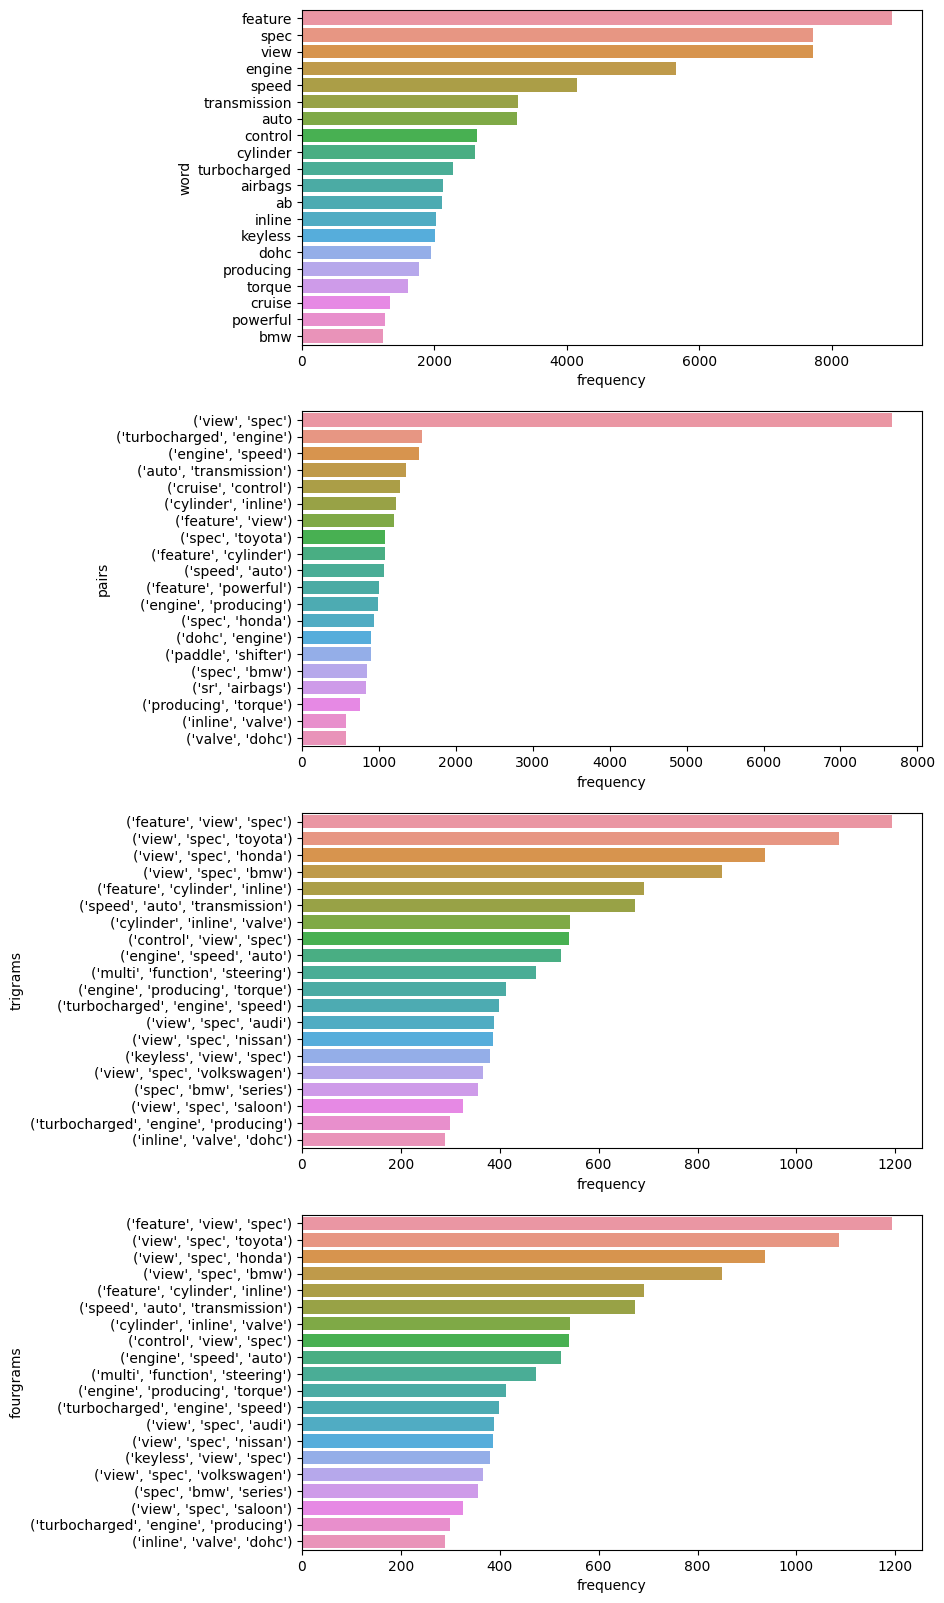

In [15]:
fig, axes = plt.subplots(4,1,figsize=(8,20))
sns.barplot(ax=axes[0],x='frequency',y='word',data=df_features_1.head(20))
sns.barplot(ax=axes[1],x='frequency',y='pairs',data=df_features_2grams.head(20))
sns.barplot(ax=axes[2],x='frequency',y='trigrams',data=df_features_3grams.head(20))
sns.barplot(ax=axes[3],x='frequency',y='fourgrams',data=df_features_4grams.head(20))

# In earlier runs, "feature", "view" and "spec" appeared frequently, likely due to the 
# design of the website and subsequent web scraping. Added those to stopword list
# and updated the stopword list.

In [20]:
# Accessories: count the words in the titles, by individual words, pairs, trigrams
accesories_1 = sumCounters([Counter(s) for s in tok_caraccessories])
accessories_2grams = sumCounters([Counter(ngrams(s,2)) for s in tok_caraccessories])
accessories_3grams = sumCounters([Counter(ngrams(s,3)) for s in tok_caraccessories])
accessories_4grams = sumCounters([Counter(ngrams(s,4)) for s in tok_caraccessories])

# Create data frames and do visualisation
df_accesories_1 = pd.DataFrame(features_1.items(),columns=['word','frequency']).sort_values(by='frequency',ascending=False)
df_accessories_2grams = pd.DataFrame(features_2grams.items(),columns=['pairs','frequency']).sort_values(by='frequency',ascending=False)
df_accessories_3grams = pd.DataFrame(features_3grams.items(),columns=['trigrams','frequency']).sort_values(by='frequency',ascending=False)
df_accessories_4grams = pd.DataFrame(features_4grams.items(),columns=['fourgrams','frequency']).sort_values(by='frequency',ascending=False)

<Axes: xlabel='frequency', ylabel='fourgrams'>

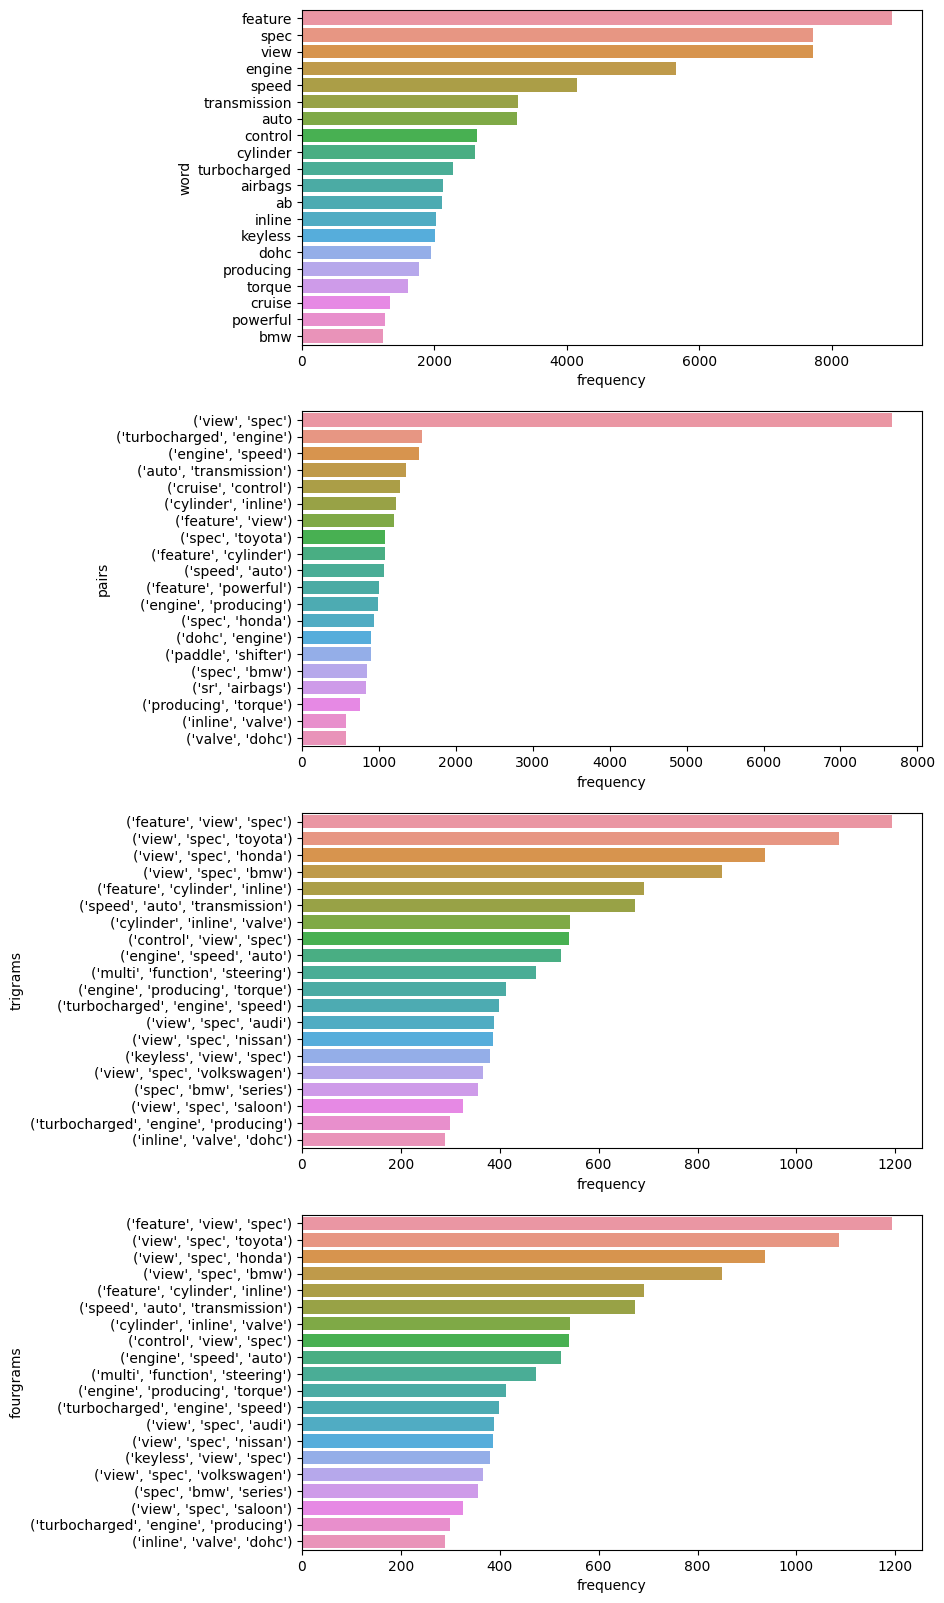

In [21]:
fig, axes = plt.subplots(4,1,figsize=(8,20))
sns.barplot(ax=axes[0],x='frequency',y='word',data=df_accesories_1.head(20))
sns.barplot(ax=axes[1],x='frequency',y='pairs',data=df_accessories_2grams.head(20))
sns.barplot(ax=axes[2],x='frequency',y='trigrams',data=df_accessories_3grams.head(20))
sns.barplot(ax=axes[3],x='frequency',y='fourgrams',data=df_accessories_4grams.head(20))

In [22]:
# Descriptions: count the words in the titles, by individual words, pairs, trigrams
descriptions_1 = sumCounters([Counter(s) for s in tok_descriptions])
descriptions_2grams = sumCounters([Counter(ngrams(s,2)) for s in tok_descriptions])
descriptions_3grams = sumCounters([Counter(ngrams(s,3)) for s in tok_descriptions])
descriptions_4grams = sumCounters([Counter(ngrams(s,4)) for s in tok_descriptions])

# Create data frames and do visualisation
df_descriptions_1 = pd.DataFrame(features_1.items(),columns=['word','frequency']).sort_values(by='frequency',ascending=False)
df_descriptions_2grams = pd.DataFrame(features_2grams.items(),columns=['pairs','frequency']).sort_values(by='frequency',ascending=False)
df_descriptions_3grams = pd.DataFrame(features_3grams.items(),columns=['trigrams','frequency']).sort_values(by='frequency',ascending=False)
df_descriptions_4grams = pd.DataFrame(features_4grams.items(),columns=['fourgrams','frequency']).sort_values(by='frequency',ascending=False)

<Axes: xlabel='frequency', ylabel='fourgrams'>

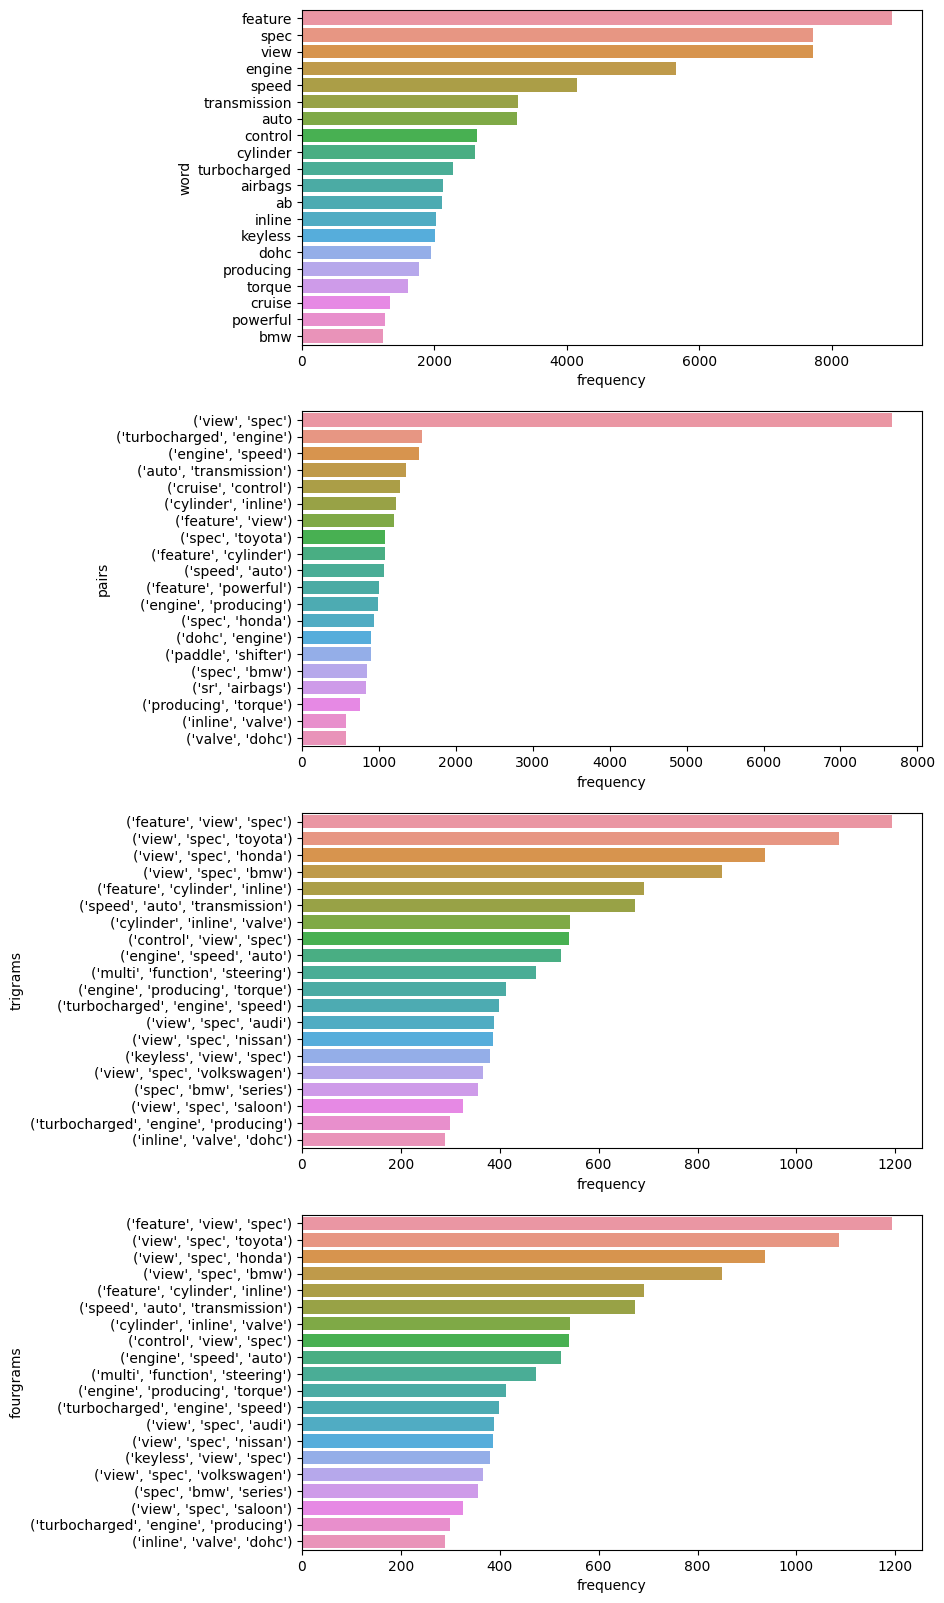

In [23]:
fig, axes = plt.subplots(4,1,figsize=(8,20))
sns.barplot(ax=axes[0],x='frequency',y='word',data=df_descriptions_1.head(20))
sns.barplot(ax=axes[1],x='frequency',y='pairs',data=df_descriptions_2grams.head(20))
sns.barplot(ax=axes[2],x='frequency',y='trigrams',data=df_descriptions_3grams.head(20))
sns.barplot(ax=axes[3],x='frequency',y='fourgrams',data=df_descriptions_4grams.head(20))

In [24]:
# Descriptions: count the words in the titles, by individual words, pairs, trigrams
categories_1 = sumCounters([Counter(s) for s in tok_new_categories])
categories_2grams = sumCounters([Counter(ngrams(s,2)) for s in tok_new_categories])
categories_3grams = sumCounters([Counter(ngrams(s,3)) for s in tok_new_categories])
categories_4grams = sumCounters([Counter(ngrams(s,4)) for s in tok_new_categories])

# Create data frames and do visualisation
df_categories_1 = pd.DataFrame(features_1.items(),columns=['word','frequency']).sort_values(by='frequency',ascending=False)
df_categories_2grams = pd.DataFrame(features_2grams.items(),columns=['pairs','frequency']).sort_values(by='frequency',ascending=False)
df_categories_3grams = pd.DataFrame(features_3grams.items(),columns=['trigrams','frequency']).sort_values(by='frequency',ascending=False)
df_categories_4grams = pd.DataFrame(features_4grams.items(),columns=['fourgrams','frequency']).sort_values(by='frequency',ascending=False)

<Axes: xlabel='frequency', ylabel='fourgrams'>

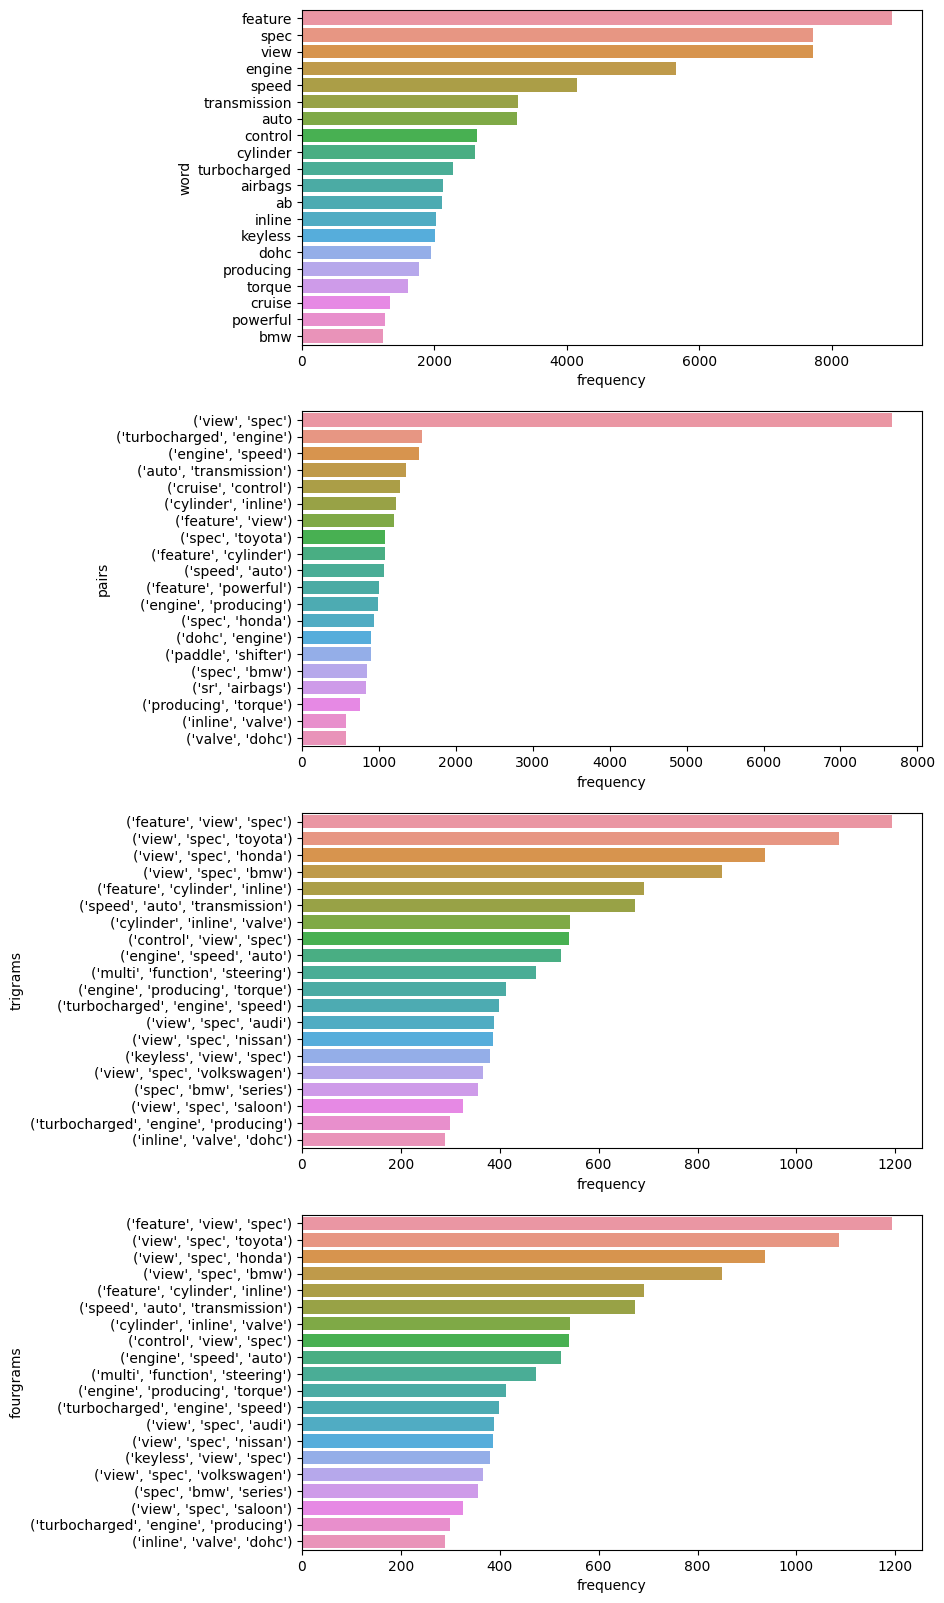

In [25]:
fig, axes = plt.subplots(4,1,figsize=(8,20))
sns.barplot(ax=axes[0],x='frequency',y='word',data=df_categories_1.head(20))
sns.barplot(ax=axes[1],x='frequency',y='pairs',data=df_categories_2grams.head(20))
sns.barplot(ax=axes[2],x='frequency',y='trigrams',data=df_categories_3grams.head(20))
sns.barplot(ax=axes[3],x='frequency',y='fourgrams',data=df_categories_4grams.head(20))